<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise6_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9- analogous to task 4, but predicting continuous subject age and using 43 different versions of Craddock region atlas resolutions (.scorr_mean). Since there are no classes in the continuous case, divide the datapoints into two equal sized groups based on age (sort the points based on age and divide in two).

In [ ]:
!pip install nilearn

In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib

In [3]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [4]:
# We prepare the model with the required parameters and the cross-validator
ridge = Ridge(max_iter=1e4)
montecarlo = StratifiedShuffleSplit(n_splits=50, test_size=.20)

# We pre-allocate the variables we want to populate with accuracy scores
k_scores = []

# We create the iterating variable
versions = list(range(1,43))

In [5]:
for x in versions:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
    crad = datasets.fetch_atlas_craddock_2012()
    atlas_nii = index_img(crad['scorr_mean'], (x)) # this needs to be modified for some tasks
    print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring
     
    X, y = input_variables, output_variable
    X = scaler.fit_transform(X)
    
    # We sort and discretize the output variable
    sort = np.argsort(y)
    y = y[sort]
    X = X[sort]
    y = np.digitize(y,[-1,-0.5,0,0.5,1,1.5]) # NOTE! here we discretize the variable into 7 bins, as opposed to the 2 bins we're asked for in the instructions

    scores = cross_val_score(ridge, X, y, cv=montecarlo)
    k_scores.append(scores) # We store the scores

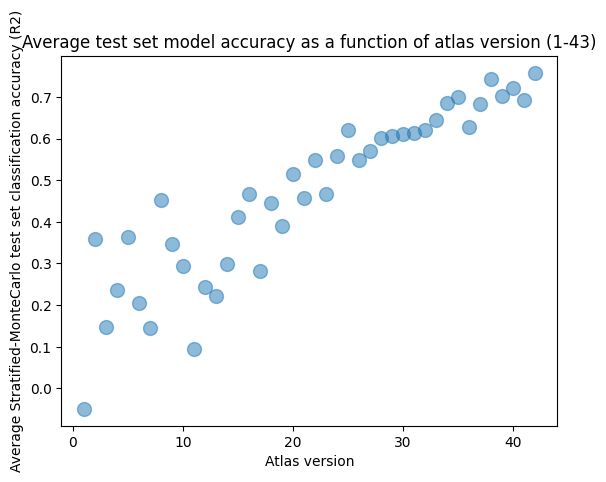

In [6]:
mean_scores = mean(k_scores,axis=1)
    
# We're ready to plot
plt.style.use("default")
plt.scatter(versions,mean_scores, s=100, alpha = 0.5)
plt.gca().set(
    title="Average test set model accuracy as a function of atlas version (1-43)",
    xlabel="Atlas version",
    ylabel="Average Stratified-MonteCarlo test set classification accuracy (R2)"
)
plt.show()

Stratifed-MonteCarlo cv reveals the same ascending trend, yet again. 